In [1]:
using Pkg

include(raw"C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2\scripts\intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random
using Cairo
using Fontconfig
using RSGraphics
using LaTeXStrings

Currently active project is: HN_V2

Path of active project: C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



[ Info: Precompiling HNProcess [top-level] (cache misses: wrong source (2))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
[ Info: Precompiling DataRefine [top-level] (cache misses: wrong source (2))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
[ Info: Precompiling PartitioningData [top-level] (cache misses: wrong source (2))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
[ Info: Precompiling RSGraphics [top-level] (cache misses: wrong source (2))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


In [8]:
sim_time = 4
steps = 3000
im_all = orthogonal_image_generator(64)
im_all_vec = vec.(im_all)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
#sl::Vector{Int64}=shuffle(1:64)[1:7] #random
sl::Vector{Int64}=[3,8,10,14] #random
for t in sl
    push!(selected, im_all[t])
end
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))
@show length(parameters["images"])
 m = filter(x -> !(x in sl), 1:64)
@show m
 f = filter(x -> x in sl, 1:64)
@show f

64
4
length(parameters["images"]) = 4
m = [1, 2, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
f = [3, 8, 10, 14]


4-element Vector{Int64}:
  3
  8
 10
 14

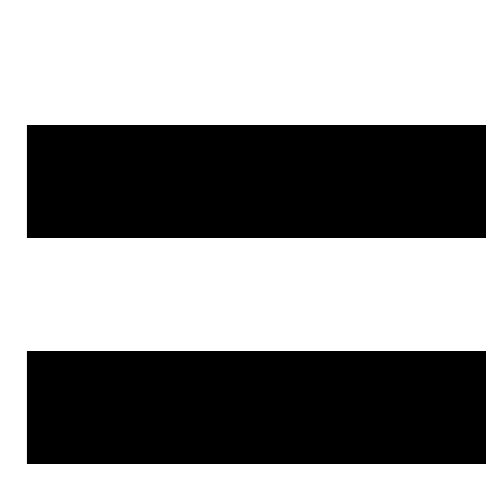

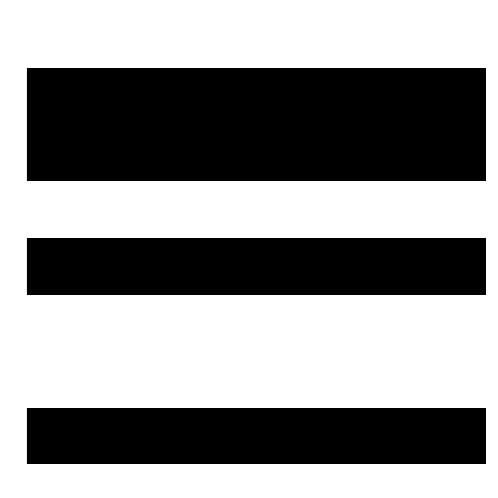

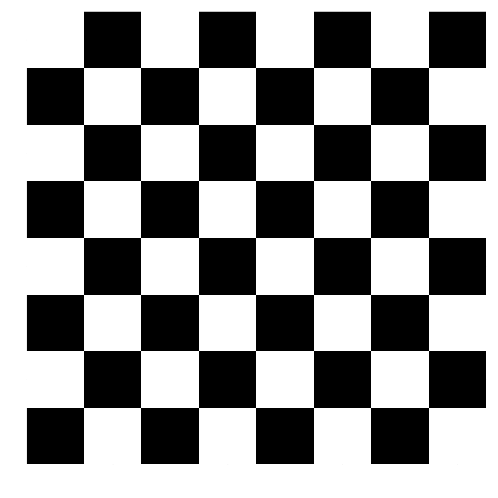

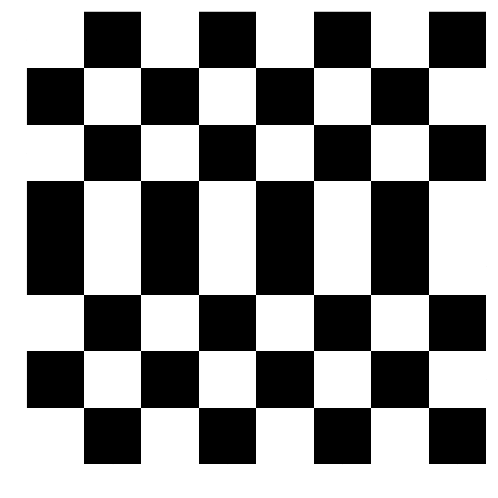

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │      1 │      1 │      1 │      1 │      1 │     -1 │
│     -1 │      1 │     -1 │     -1 │     -1 │      1 │     -1 │      1 │
│      1 │     -1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │      1 │      1 │     -1 │      1 │
│      1 │     -1 │      1 │     -1 │      1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │      1 │     -1 │      1 │
│      1 │      1 │      1 │      1 │      1 │     -1 │      1 │      1 │
│     -1 │      1 │     -1 │     -1 │     -1 │      1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col

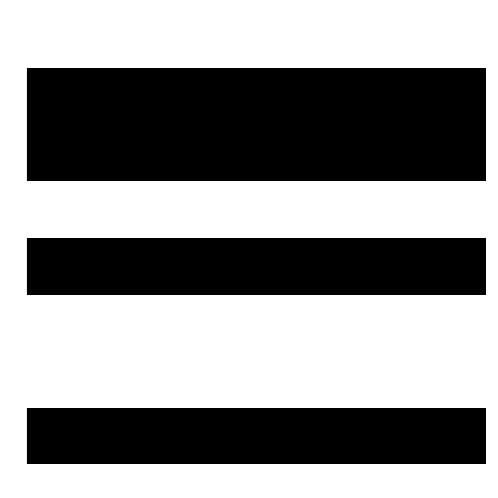

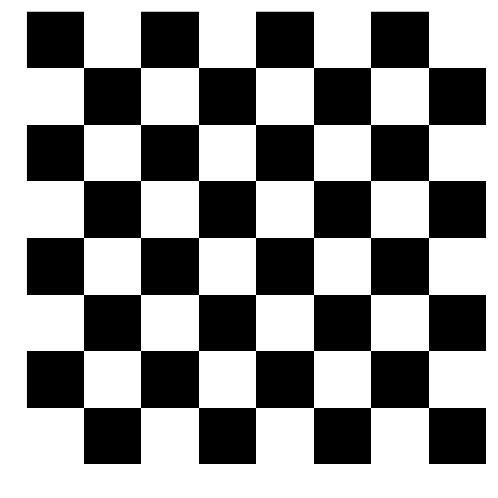

In [12]:
l=0
for i in parameters["images"]
    l+=1
    binary_image_visualizer(reshape(i,8,8),500,"image_$(l)_t1",sav= false,d= true)
end

res = HN_Solver_Traj(parameters, true);
k = sol_finder(res[1], parameters, true)
l=0
for i in k
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_$(l)_t1",sav= false,d= true)
end